In [1]:
import cv2 as cv
import time
import mediapipe as mp
from matplotlib import pyplot as plt

print(cv.__version__)

4.5.2


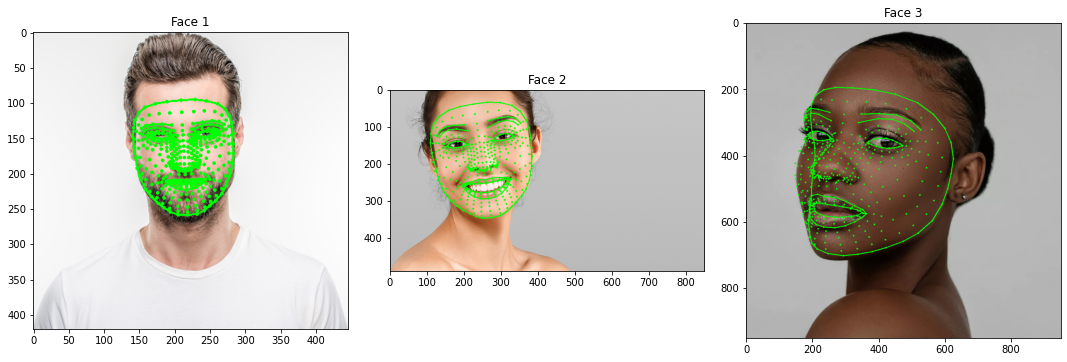

In [2]:
img1 = cv.imread("C:/opencv/opencv/medias/face1.png")
img2 = cv.imread("C:/opencv/opencv/medias/face2.jpg")
img3 = cv.imread("C:/opencv/opencv/medias/face3.png")


for im in [img1, img2, img3]:
    mp_draw = mp.solutions.drawing_utils
    mp_faceMesh = mp.solutions.face_mesh
    faceMesh = mp_faceMesh.FaceMesh()
    drawSpec = mp_draw.DrawingSpec(thickness=2, circle_radius=1)
    detection = faceMesh.process(im)
    if detection.multi_face_landmarks:
        for face_landmark in detection.multi_face_landmarks:
            mp_draw.draw_landmarks(im, face_landmark, mp_faceMesh.FACE_CONNECTIONS,
            drawSpec, drawSpec)
            for id,flm in enumerate(face_landmark.landmark):
                img_height, img_width, img_channel = im.shape
                x, y = int(flm.x * img_width), int(flm.y * img_height)
            
row, col = 1, 3
figure, axis = plt.subplots(row, col, figsize=(15, 10))
figure.tight_layout()

axis[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
axis[0].set_title('Face 1')

axis[1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
axis[1].set_title('Face 2')

axis[2].imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
axis[2].set_title('Face 3')

plt.show()

# Video

In [3]:
cap = cv.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)
fourcc =cv.VideoWriter_fourcc(*'mp4v')
out = cv.VideoWriter('C:/opencv/opencv/asdasd.mp4', fourcc, 20.0, (640, 480))
prev_time = 0

mp_draw = mp.solutions.drawing_utils
mp_faceMesh = mp.solutions.face_mesh
faceMesh = mp_faceMesh.FaceMesh()
drawSpec = mp_draw.DrawingSpec(thickness=1, circle_radius=2)

while cap.isOpened():
    success, img = cap.read()
    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    detection = faceMesh.process(img)
    if success == True:
        if detection.multi_face_landmarks:
            for face_landmark in detection.multi_face_landmarks:
                mp_draw.draw_landmarks(img, face_landmark, mp_faceMesh.FACE_CONNECTIONS,
                drawSpec, drawSpec)
                for id,face_lm in enumerate(face_landmark.landmark):
                    img_height, img_width, img_channel = img.shape
                    x, y = int(face_lm.x * img_width), int(face_lm.y * img_height)
    out.write(img)
    
    cur_time = time.time()
    fps = int(1 / (cur_time - prev_time))
    prev_time = cur_time
    cv.putText(img, f'FPS: {fps}', (10,50), cv.FONT_HERSHEY_COMPLEX, 0.5, (255,0,0), 2)

    cv.imshow("Face", img)
    if cv.waitKey(5) & 0xFF == ord("q"):
        break

out.release()
cap.release()
cv.destroyAllWindows()